# Modelo de Regresión líneal con preprocesamiento tipo Grid Image

## Importación de librerías

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error, r2_score


## Carga de datos

### Datos para Perth

In [2]:
perth_49_df = pd.read_csv('WEC_Perth_49.csv', sep=',')
perth_100_df = pd.read_csv('WEC_Perth_100.csv', sep=',')

print(f"muestras para Perth 49: {perth_49_df.shape[0]}")
print(f"muestras para Perth 100: {perth_100_df.shape[0]}")

muestras para Perth 49: 36043
muestras para Perth 100: 7277


#### ¿Existen datos duplicados?

In [18]:
perth_49_indexes = perth_49_df.duplicated(keep=False)
perth_100_indexes = perth_100_df.duplicated(keep=False)

grouped_dataset = perth_49_df[perth_49_indexes].groupby(by=['Total_Power']).mean()
grouped_dataset

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power41,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW
Total_Power,,,,,,,,,,,,,,,,,,,,,
3509648.25,0.0,0.0,350.00,50.00,700.0,50.00,0.00,100.00,100.0,100.0,...,73114.43,73780.05,89096.62,85192.81,89697.54,99048.57,89691.55,96551.98,96252.93,0.74
3553323.48,400.0,0.0,0.00,50.00,0.0,100.00,150.00,150.00,550.0,150.0,...,65283.13,75056.38,98205.56,89030.02,102222.34,89512.00,97535.92,96632.78,98117.48,0.75
3562702.84,50.0,0.0,350.00,0.00,250.0,50.00,850.00,50.00,300.0,100.0,...,87467.99,92375.94,98715.25,96865.67,97760.73,85261.97,98819.47,98495.62,96831.75,0.75
3570177.23,650.0,0.0,750.00,0.00,950.0,0.00,250.00,50.00,350.0,50.0,...,75906.50,82637.02,82382.46,83461.41,96775.64,97971.50,88517.67,99197.50,96909.49,0.76
3573216.11,600.0,0.0,800.00,0.00,50.0,50.00,400.00,50.00,900.0,50.0,...,76072.12,82157.11,98414.45,85981.67,88564.32,98918.72,96471.28,98609.61,97498.01,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162938.77,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,100464.16,105864.27,92167.09,100031.84,101690.38,102685.63,100375.49,92441.87,98736.20,0.88
4163457.77,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,101394.11,101883.53,92935.82,100131.79,101742.25,102596.12,100416.67,96352.01,97135.47,0.88
4164336.36,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,101367.23,100623.33,92248.11,100133.21,101747.06,102539.41,100425.97,99368.84,97478.38,0.88


In [13]:
perth_49_df[perth_49_df['Total_Power'] == 3509648.25]

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
13098,0.0,0.0,350.0,50.0,700.0,50.0,0.0,100.0,100.0,100.0,...,73780.05,89096.62,85192.81,89697.54,99048.57,89691.55,96551.98,96252.93,0.74,3509648.25
13115,0.0,0.0,350.0,50.0,700.0,50.0,0.0,100.0,100.0,100.0,...,73780.05,89096.62,85192.81,89697.54,99048.57,89691.55,96551.98,96252.93,0.74,3509648.25


In [3]:
perth_49_df.drop_duplicates(inplace=True)
perth_100_df.drop_duplicates(inplace=True)

print(f"muestras reales para Perth 49: {perth_49_df.shape[0]}")
print(f"muestras reales para Perth 100: {perth_100_df.shape[0]}")

muestras reales para Perth 49: 10936
muestras reales para Perth 100: 2737


## Procesamiento Grid Image

Para realizar el procesammiento debemos extraer primero la matriz de caracteristicas y el vector de target

In [4]:
def extract_features_target(df):
    '''
    Given an appropriate dataset df with the large wave farm data identifies
    the number of converters and extract the matrix of features and the target
    vector.

    Input: dataframe with the wave farm data

    Output:
    X = feauture matrix (N x 2*n_converters): coordinates of converters where
        each row represent a different layout described as
        X1, Y1, X2, Y2, ... Xn, Yn
    y = vector target (N,1): total power generated by each layout
    '''
    #Identify if the dataset corresponds to 49 or 100 converters
    if df.shape[1] == 3*49+2:
        n_converters = 49
    elif df.shape[1] == 3*100+2:
        n_converters = 100
    else:
        print('Invalid or corrupted dataset')
        return
    # Extract the geometrical information
    X = df.iloc[:, 0:2*n_converters].values
    y = df['Total_Power'].values.reshape(-1,1)

    return X, y

In [6]:
X_49, y_49 = extract_features_target(perth_49_df)
X_100, y_100 = extract_features_target(perth_100_df)

In [5]:
def generate_grid(X, gamma=50, size=80):
    '''
    Transforms the matrix of features into a new matrix where each row corresponds
    to a grid representing the geometrical characterists of the layout as
    a picture of size x size pixels in a flattened vector version. Each pixel assigns a
    value corresponding to the summation of a gaussian kernel with parameter gamma
    using the euclidean distances between the equivalent centroid of the pixel
    and the location of each converter

    Input: X = feauture matrix (N x 2*n_converters): coordinates of converters
           size = number of pixels for each dimension for the squared picture
    '''
    if X.shape[1]%2 != 0:
        print('Invalid matrix of features')
        return

    n_converters = X.shape[1]//2
    # Compute the layout size l x w with l = w rounded to the next hundred
    layout_size = int((np.sqrt(n_converters*20000)//100)*100)
    if np.sqrt(n_converters*20000)%100 != 0:
        layout_size += 100

    # Vectors with the x and y coordinates of the grid (column vectors 80x1)
    cell_length = layout_size/size
    x_init = cell_length/2
    y_init = layout_size - x_init

    x_coords = np.arange(x_init, layout_size, cell_length).reshape(-1,1)
    y_coords = np.arange(y_init, 0, -cell_length).reshape(-1,1)

    # Initialize the resultant matrix N x (size*size)
    X_grid = np.zeros((X.shape[0], size*size))
    # Compute kernel function and generate each grid picture per row
    for i in range(X.shape[0]):
        x_conv = X[i, 0:2*n_converters:2].reshape(1,-1)
        y_conv = X[i, 1:2*n_converters:2].reshape(1,-1)
        x = np.exp(-0.5*((x_coords - x_conv)/gamma)**2)
        y = np.exp(-0.5*((y_coords - y_conv)/gamma)**2)

        X_grid[i, :] = np.dot(y, x.T).flatten()

    return X_grid

In [23]:
X_grid_49 = generate_grid(X_49)
X_grid_100 = generate_grid(X_100)

Una de las bondades vistas para este procesamiento es que permite combinar los datos de diversidad cantidad de convertidores. Exploraremos como se comporta el modelo si se combinan y si el solo manejo de una representación del layout mediante la imagen es suficiente como entrada para la predicción

In [24]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])
np.concatenate((A, B), axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [26]:
X = np.concatenate((X_grid_49, X_grid_100), axis=0)
y = np.concatenate((y_49, y_100), axis=0)

print(f"Muestras totales en el dataset: {X.shape[0]}")
print(f"Valores del vector de target: {y.shape[0]}")

Muestras totales en el dataset: 13673
Valores del vector de target: 13673


## Reducción de dimensiones

Buscamos ahora el número de componentes optimo que garantice conservar una varianza explicada en los layouts de al menos un 90%

In [7]:
def pca_analysis(X, n_comp=None, explained_variance=0.90):
    '''
    Reduces the dimensionality of the grid representation using a PCA analysis
    With a default parameter of 90% of explained variance

    Input: X = the grid representation of the converters locations
           n_comp = number of components to reduce the dimensionality
           explained_variance = percentage of explained variance to keep
    Output: X_pca = the reduced grid representation
    '''
    from sklearn.decomposition import PCA

    if not n_comp:
        n_comp = explained_variance

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    pca = PCA(n_components=n_comp)

    return pca, pca.fit_transform(X)

In [29]:
pca, X_pca = pca_analysis(X, explained_variance=0.90)

In [31]:
print(f"Número de componentes: {pca.n_components_}")
print(f"Varianza explicada: {pca.explained_variance_ratio_.sum()}")
print(f"Varianza explicada por cada componente:")
pca.explained_variance_ratio_


Número de componentes: 56
Varianza explicada: 0.9026536331820021
Varianza explicada por cada componente:


array([0.06858237, 0.05350157, 0.0438695 , 0.04269353, 0.03764472,
       0.03580091, 0.03414852, 0.03242116, 0.03085089, 0.02947998,
       0.02733369, 0.02671502, 0.02531505, 0.02450876, 0.02412597,
       0.02374938, 0.02189534, 0.02142089, 0.02059435, 0.02008897,
       0.01984691, 0.01940877, 0.01826731, 0.01793327, 0.01687866,
       0.0158003 , 0.0116404 , 0.00790822, 0.00753299, 0.00725505,
       0.00663391, 0.00653164, 0.00631762, 0.00605926, 0.0057369 ,
       0.00550511, 0.00540867, 0.00536189, 0.00492652, 0.00475455,
       0.00466046, 0.0045649 , 0.00416299, 0.00403088, 0.00397962,
       0.00392261, 0.00378867, 0.00367735, 0.003542  , 0.00344855,
       0.00331512, 0.00324988, 0.00307356, 0.00301887, 0.00290664,
       0.00286302])

Es interesante observar que al contrario con los comportamientos usuales de descomposición por componentes que las dos o tres primeras componentes suelen explicar el mayor porcentaje de la varianza, para esta representación se requieren cerca de 10 componentes para solo dar cuenta de un 40% de la varianza

## Regresión Lineal

In [32]:
n_comp = pca.n_components_
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

pca = PCA(n_components=n_comp)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [33]:
from sklearn.metrics import root_mean_squared_error, r2_score

model = LinearRegression()
model.fit(Xtrain, ytrain)

ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

R_train = r2_score(ytrain, ytrain_pred)
R_test = r2_score(ytest, ytest_pred)

RMSE = root_mean_squared_error(ytrain, ytrain_pred)
MAPE = mean_absolute_percentage_error(ytrain, ytrain_pred)

print(f"R² for train data: {R_train}")
print(f"Root Mean squared error on train data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on train data: {MAPE}")

RMSE = root_mean_squared_error(ytest, ytest_pred)
MAPE = mean_absolute_percentage_error(ytest, ytest_pred)

print(f"R² for test data: {R_test}")
print(f"Root Mean squared error on test data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on test: {MAPE}")

R² for train data: 0.7816046206973255
Root Mean squared error on train data: 0.5774909154417281 MW
Mean absolute percentage error on train data: 0.07973897157286183
R² for test data: 0.7858690295989035
Root Mean squared error on test data: 0.5703582183682305 MW
Mean absolute percentage error on test: 0.07959422230265556


Vemos que el rendimiento disminuye un poco al combinar los datasets y dejar solo la información de la geometría capturada por la grid. Probamos ahora que pasa con la predicción si escalamos la variable de salida primero a MW

In [36]:
ytrain_MW = ytrain/10**6
ytest_MW = ytest/10**6

model = LinearRegression()
model.fit(Xtrain, ytrain_MW)

ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

R_train = r2_score(ytrain_MW, ytrain_pred)
R_test = r2_score(ytest_MW, ytest_pred)

RMSE = root_mean_squared_error(ytrain_MW, ytrain_pred)
MAPE = mean_absolute_percentage_error(ytrain_MW, ytrain_pred)

print(f"R² for train data: {R_train}")
print(f"Root Mean squared error on train data: {RMSE} MW") # In MW
print(f"Mean absolute percentage error on train data: {MAPE}")

RMSE = root_mean_squared_error(ytest_MW, ytest_pred)
MAPE = mean_absolute_percentage_error(ytest_MW, ytest_pred)

print(f"R² for test data: {R_test}")
print(f"Root Mean squared error on test data: {RMSE} MW") # In MW
print(f"Mean absolute percentage error on test: {MAPE}")

R² for train data: 0.7816046206973255
Root Mean squared error on train data: 0.5774909154417283 MW
Mean absolute percentage error on train data: 0.07973897157286183
R² for test data: 0.7858690295989035
Root Mean squared error on test data: 0.5703582183682304 MW
Mean absolute percentage error on test: 0.07959422230265559


Veremos que tanto mejora el modelo de regresión lineal si aplicamos una función cuadrática agregando columnas a la matriz de caracteristicas transformadas correspondientes a los cuadrados de cada columna

In [37]:
A = np.array([[1, 2, 3], [4, 5, 6]])
cols = A.shape[1]
B = np.zeros((A.shape[0], 2*cols))
B[:, 0:cols] = A
B[:, cols:] = A**2
B

array([[ 1.,  2.,  3.,  1.,  4.,  9.],
       [ 4.,  5.,  6., 16., 25., 36.]])

In [39]:
def quadratic_features_expansion(X):
    '''
    Add a new column with the square of the component i of the features
    matrix
    Input: X = feauture matrix
    Output: X_new = new feature matrix
    '''
    cols = X.shape[1]
    X_new = np.zeros((X.shape[0], 2*cols))
    X_new[:, 0:cols] = X
    X_new[:, cols:] = X**2

    return X_new

In [40]:
Xquad = quadratic_features_expansion(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xquad, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

pca = PCA(n_components=n_comp)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [41]:
from sklearn.metrics import root_mean_squared_error, r2_score

model = LinearRegression()
model.fit(Xtrain, ytrain)

ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

R_train = r2_score(ytrain, ytrain_pred)
R_test = r2_score(ytest, ytest_pred)

RMSE = root_mean_squared_error(ytrain, ytrain_pred)
MAPE = mean_absolute_percentage_error(ytrain, ytrain_pred)

print(f"R² for train data: {R_train}")
print(f"Root Mean squared error on train data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on train data: {MAPE}")

RMSE = root_mean_squared_error(ytest, ytest_pred)
MAPE = mean_absolute_percentage_error(ytest, ytest_pred)

print(f"R² for test data: {R_test}")
print(f"Root Mean squared error on test data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on test: {MAPE}")

R² for train data: 0.7709989300511461
Root Mean squared error on train data: 0.5913467164429385 MW
Mean absolute percentage error on train data: 0.08148038099360347
R² for test data: 0.7750892784667129
Root Mean squared error on test data: 0.5845383920497339 MW
Mean absolute percentage error on test: 0.08125130297707849


Vemos que con este ajuste no existe una mejora real sobre el desempeño de la regresión lineal por lo que ajustamos ahora una estrategia que permita reconocer también el numéro de convertidores de cada muestra

In [42]:
A = np.array([[1, 2, 3], [4,5,6]])
cols = A.shape[1]
A_new = np.zeros((A.shape[0], cols+1))
A_new[:, 0:cols] = A
A_new[:, cols] = 49
A_new

array([[ 1.,  2.,  3., 49.],
       [ 4.,  5.,  6., 49.]])

In [43]:
def add_column(X, n_converters):
    '''
    Add a new column with the number of converters of each sample
    for the transformed matrices
    Input: X = Representation of layouts as a grid image for each sample
           n_converters = associated number of converters in the X data
    Output: X_new = Matrix X with the new column with the number of converters added
    '''
    cols = X.shape[1]
    X_new = np.zeros((X.shape[0], cols+1))
    X_new[:,0:cols] = X
    X_new[:,cols] = n_comp

    return X_new

In [46]:
X_grid_49_n = add_column(X_grid_49, 49)
X_grid_100_n = add_column(X_grid_100, 100)

X = np.concatenate((X_grid_49_n, X_grid_100_n), axis=0)


In [47]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

pca = PCA(n_components=n_comp)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [48]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

R_train = r2_score(ytrain, ytrain_pred)
R_test = r2_score(ytest, ytest_pred)

RMSE = root_mean_squared_error(ytrain, ytrain_pred)
MAPE = mean_absolute_percentage_error(ytrain, ytrain_pred)

print(f"R² for train data: {R_train}")
print(f"Root Mean squared error on train data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on train data: {MAPE}")

RMSE = root_mean_squared_error(ytest, ytest_pred)
MAPE = mean_absolute_percentage_error(ytest, ytest_pred)

print(f"R² for test data: {R_test}")
print(f"Root Mean squared error on test data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on test: {MAPE}")

R² for train data: 0.7827950706943666
Root Mean squared error on train data: 0.5759148439611593 MW
Mean absolute percentage error on train data: 0.0794420298593209
R² for test data: 0.7867012785434496
Root Mean squared error on test data: 0.5692487521619519 MW
Mean absolute percentage error on test: 0.07929817477391189


Vemos que añadir la información del numéro de convertidores no mejora el desempeño del modelo y que entrenar un modelo con la información mezclada parece no dar resultados muy buenos, pues a pesar de un valor relativamente bueno del coeficiente de determinación $R^2$ el error cuadratico medio es del orden de 100 veces mayor a los resultados obtenidos entrenando solo con un conjunto de datos

### Modelos separados

#### Perth con N=49 convertidores

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_grid_49, y_49, test_size=0.30, random_state=42)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

pca = PCA(n_components=n_comp)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [51]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

R_train = r2_score(ytrain, ytrain_pred)
R_test = r2_score(ytest, ytest_pred)

RMSE = root_mean_squared_error(ytrain, ytrain_pred)
MAPE = mean_absolute_percentage_error(ytrain, ytrain_pred)

print(f"R² for train data: {R_train}")
print(f"Root Mean squared error on train data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on train data: {MAPE}")

RMSE = root_mean_squared_error(ytest, ytest_pred)
MAPE = mean_absolute_percentage_error(ytest, ytest_pred)

print(f"R² for test data: {R_test}")
print(f"Root Mean squared error on test data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on test: {MAPE}")

R² for train data: 0.7999624730530353
Root Mean squared error on train data: 0.0554576434660243 MW
Mean absolute percentage error on train data: 0.010863624325786938
R² for test data: 0.8007789773338678
Root Mean squared error on test data: 0.055931240140093784 MW
Mean absolute percentage error on test: 0.011001226193406738


### Perth con N = 100 convertidores

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_grid_49, y_49, test_size=0.30, random_state=42)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

pca = PCA(n_components=n_comp)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [53]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

R_train = r2_score(ytrain, ytrain_pred)
R_test = r2_score(ytest, ytest_pred)

RMSE = root_mean_squared_error(ytrain, ytrain_pred)
MAPE = mean_absolute_percentage_error(ytrain, ytrain_pred)

print(f"R² for train data: {R_train}")
print(f"Root Mean squared error on train data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on train data: {MAPE}")

RMSE = root_mean_squared_error(ytest, ytest_pred)
MAPE = mean_absolute_percentage_error(ytest, ytest_pred)

print(f"R² for test data: {R_test}")
print(f"Root Mean squared error on test data: {RMSE/10**6} MW") # In MW
print(f"Mean absolute percentage error on test: {MAPE}")

R² for train data: 0.8002175876590892
Root Mean squared error on train data: 0.05542226868201963 MW
Mean absolute percentage error on train data: 0.010858272726212845
R² for test data: 0.8011269057972576
Root Mean squared error on test data: 0.055882378393256875 MW
Mean absolute percentage error on test: 0.010988757942705435


## ¿Cómo cambian las representaciones segun N?

In [24]:
def plot_first_n_grid_pictures(X, n, dataset_name, n_cols=4):
    '''
    Make and print the transformed sample as a picture of sizexsize pixels.

    Input: X of the converter location data as grid pictures
           n = number of configurations to plot
           dataset_name = name of the dataset (for add the title in the plot)
           n_cols = number of columns for the subplots grid

    Output: None
    '''
    #Validate the value of n
    if n <0 or n > X.shape[0]:
        print('Invalid value of n')
        return

    float_size = np.sqrt(X.shape[1])
    width = int(float_size)

    import matplotlib.pyplot as plt
    import seaborn as sns

    #creating figures parameters (grid)
    n_rows = n//n_cols
    if n%n_cols != 0:
        n_rows += 1
    # title
    plt.figure(figsize=(20,10))
    plt.title(f'first {n} configurations for {dataset_name}')
    plt.xticks([])
    plt.yticks([])

    for i in range(n):

        im = plt.subplot(n_rows,n_cols,i+1).imshow(X[i,:].reshape(-1, width),
                                cmap='terrain', interpolation='nearest')
        im.set_clim(0, 16)

    plt.show()

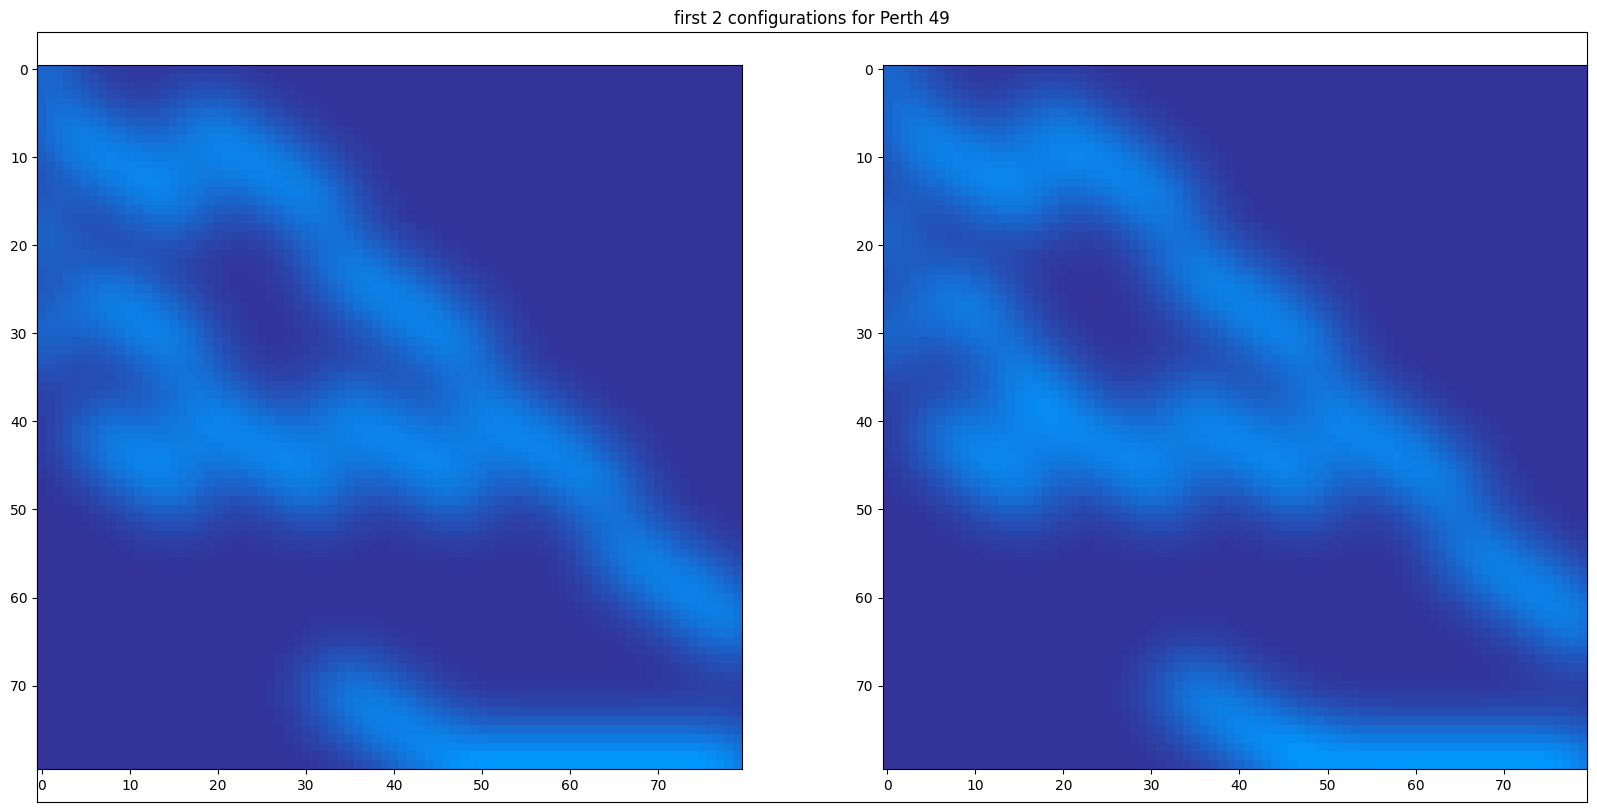

In [56]:
plot_first_n_grid_pictures(X_grid_49, 2, 'Perth 49', 2)

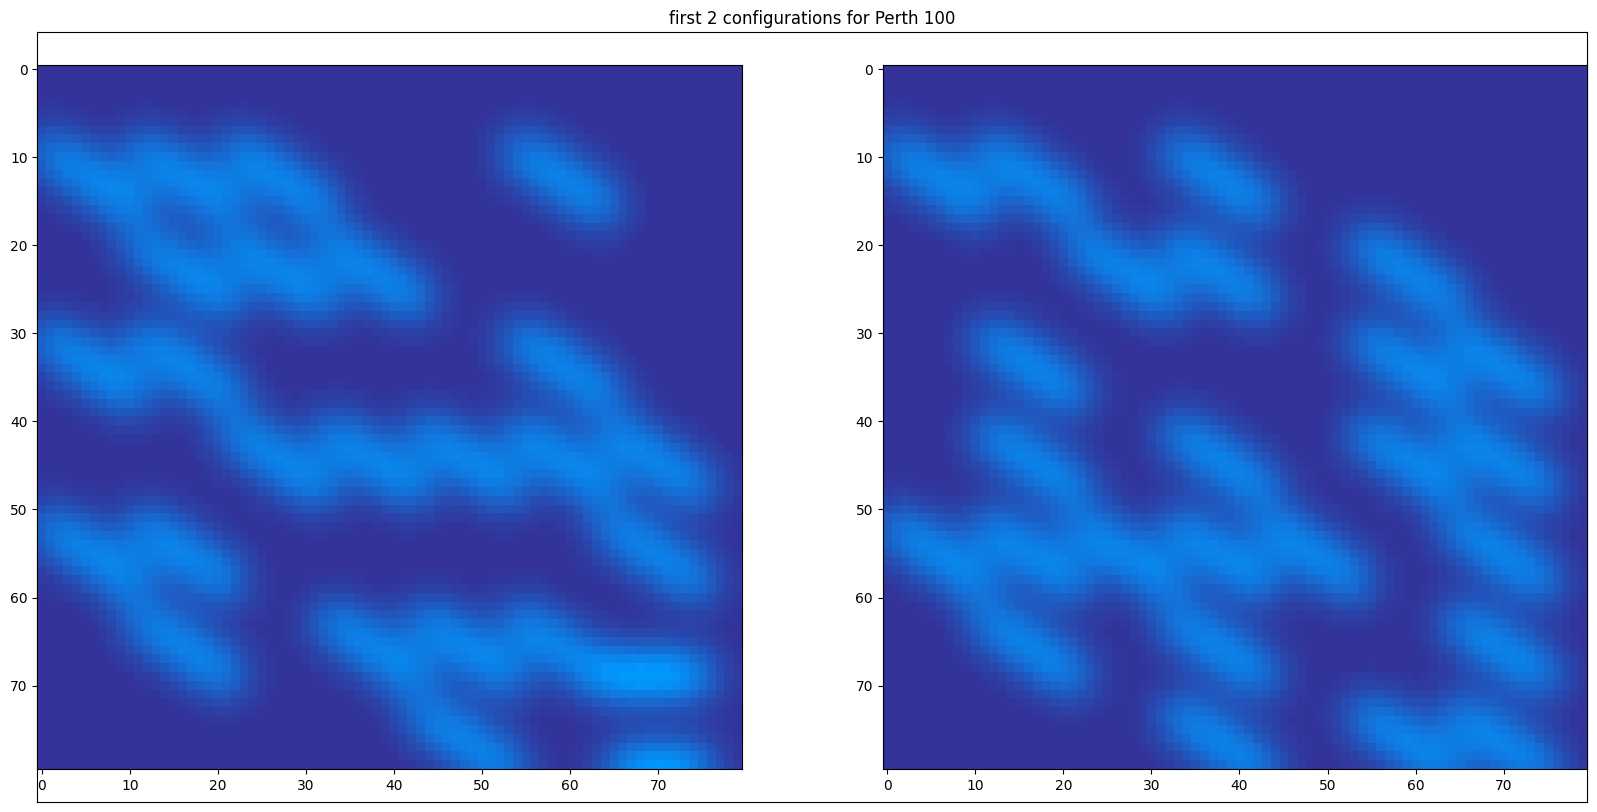

In [57]:
plot_first_n_grid_pictures(X_grid_100,2,'Perth 100',2)

## Desempeño según al paramétro asociado al "kernel" aplicado en la transformación a grid

Evaluaremos el efecto del paramétro gamma en el kernel gaussiano utilizado para convertir las entradas en imagenes grid, tanto si se combinan los datos como si se trabajan por separados, teniendo en cuenta que uno de los objetivos es la generalización del modelo a cualquier layout y cualquier numéro de convertidores

In [15]:
def evaluate_gamma(gamma_list, X1, y1, X2=None, y2=None):
    '''
    Evaluation of different values of gamma for the kernel function and its
    effects in the final model applying the pca decomposition
    Input: gamma_list = list of values of gamma to evaluate
           X = features matrix
           y = target vector
    Output: A Dataframe with the different metrics for a linear regression
            after applying the transformation to a grid representation
            Columns:
                gamma = value of gamma
                n_comp = number of components used in the PCA decomposition
                R_train = R² for train data
                R_test = R² for test data
                RMSE_train = Root Mean Squared Error for train data
                RMSE_test = Root Mean Squared Error for test data
                MAPE_train = Mean Absolute Percentage Error for train data
                MAPE_test = Mean Absolute Percentage Error for test data
    '''
    df = pd.DataFrame()
    idx = 0
    for gamma in gamma_list:
        X = generate_grid(X1, gamma=gamma)
        y = y1
        # Identification if we want to concatenate the data
        if X2 is not None:
            if y2 is None:
                print('Error: No second target provided')
                return

            X_2 = generate_grid(X2, gamma=gamma)
            X = np.concatenate((X, X_2), axis=0)
            y = np.concatenate((y, y2), axis=0)

        # Separation, preprocessing and training
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)
        # Standarization
        scaler = StandardScaler()
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        # Find the optimal number of components for a PCA decomposition and applies
        pca = PCA(n_components=0.90)
        Xtrain = pca.fit_transform(Xtrain)
        Xtest = pca.transform(Xtest)
        # Regression model
        model = LinearRegression()
        model.fit(Xtrain, ytrain)
        # Predictions
        ytrain_pred = model.predict(Xtrain)
        ytest_pred = model.predict(Xtest)
        # Metrics
        R_train = r2_score(ytrain, ytrain_pred)
        R_test = r2_score(ytest, ytest_pred)
        RMSE_train = root_mean_squared_error(ytrain, ytrain_pred)
        RMSE_test = root_mean_squared_error(ytest, ytest_pred)
        MAPE_train = mean_absolute_percentage_error(ytrain, ytrain_pred)
        MAPE_test = mean_absolute_percentage_error(ytest, ytest_pred)
        # Add the metrics to the dataframe
        df.loc[idx, 'gamma'] = gamma
        df.loc[idx, 'n_comp'] = pca.n_components_
        df.loc[idx, 'R_train'] = R_train
        df.loc[idx, 'R_test'] = R_test
        df.loc[idx, 'RMSE_train'] = RMSE_train
        df.loc[idx, 'RMSE_test'] = RMSE_test
        df.loc[idx, 'MAPE_train'] = MAPE_train
        df.loc[idx, 'MAPE_test'] = MAPE_test
        idx += 1

    return df


In [16]:
gammas = [2, 5, 10, 50, 100, 150]

In [17]:
df = evaluate_gamma(gammas, X_49, y_49, X_100, y_100)

In [18]:
df

,gamma,n_comp,R_train,R_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test
0,2.0,536.0,0.965551,-9.763061e+33,229357.239328,1.217870e+23,0.028878,5.124644e+14
1,5.0,789.0,0.996583,8.499712e-01,72238.863340,4.774142e+05,0.011315,2.041872e-02
2,10.0,704.0,0.992721,9.814829e-01,105430.012622,1.677235e+05,0.015844,1.907689e-02
3,50.0,60.0,0.785938,7.883489e-01,571733.457514,5.670459e+05,0.079559,7.973509e-02
4,100.0,21.0,0.557340,5.648481e-01,822164.522577,8.130709e+05,0.143645,1.433868e-01
5,150.0,12.0,0.515133,5.157825e-01,860467.994940,8.576858e+05,0.146005,1.464868e-01


De los resultados anteriores se observa un comportamiento inestable cuando el paramétro gamma se ajusta a un valor demasiado pequeño, pero es más estable a partir de un gamma de 10

In [20]:
gammas = [10, 20, 30]
df2 = evaluate_gamma(gammas, X_49, y_49, X_100, y_100)

KeyboardInterrupt: 

In [21]:
df2

,gamma,n_comp,R_train,R_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test
0,10.0,704.0,0.992721,0.981483,105430.012622,167723.548636,0.015844,0.019077
1,20.0,282.0,0.935883,0.927089,312902.581659,332815.173270,0.041065,0.042549
2,30.0,148.0,0.900675,0.898244,389450.133315,393177.256645,0.053100,0.053057


In [22]:
gammas = [15, 25]
df3 = evaluate_gamma(gammas, X_49, y_49, X_100, y_100)

In [23]:
df3

,gamma,n_comp,R_train,R_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test
0,15.0,438.0,0.974419,0.969272,197644.086400,216059.098548,0.025442,0.027240
1,25.0,201.0,0.919186,0.913377,351291.583067,362764.103871,0.046849,0.047744


Se observa que un valor adecuado de gamma seria de 10 ó 15 y un número de componentes entre 438 y 704. Las imágenes con estos valores son mucho más dispersas y representan casi que las configuraciones puntuales

In [25]:
X_grid_49 = generate_grid(X_49, gamma=15)
X_grid_100 = generate_grid(X_100, gamma=15)

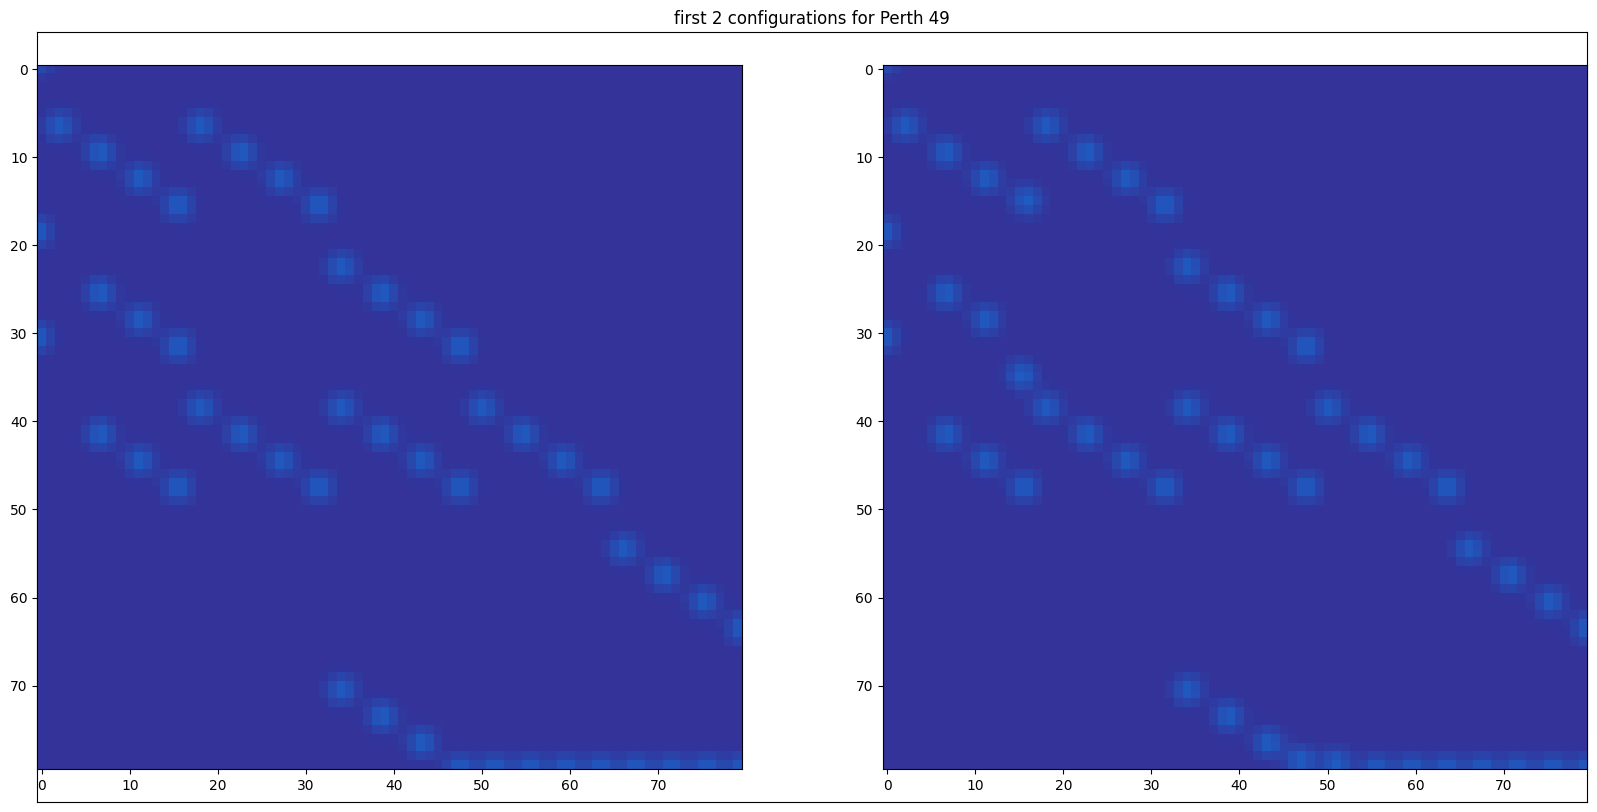

In [26]:
plot_first_n_grid_pictures(X_grid_49, 2, 'Perth 49', 2)

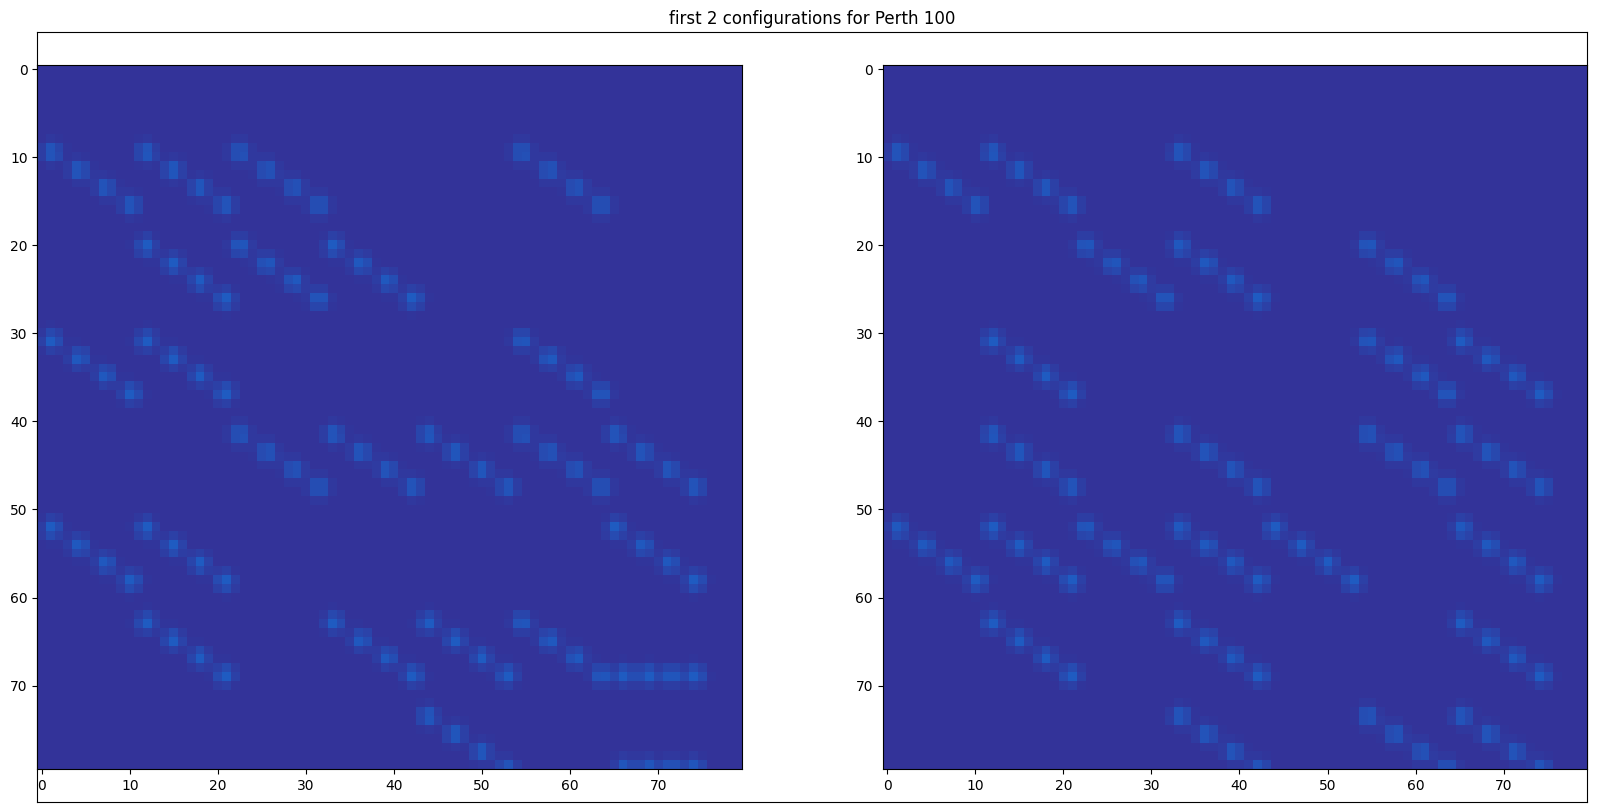

In [27]:
plot_first_n_grid_pictures(X_grid_100, 2, 'Perth 100', 2)

In [46]:
def validation(X1, y1, X2=None, y2=None, gamma=15, n_comp= 438, n_splits=5):
    '''
    Exceutes a cross validation procedure for the application of
    the proposed model
    Input: X1, X2 = features matrices
           y1, y2 = target vectors
           gamma = value of gamma for the kernel function
    '''
    from sklearn.model_selection import KFold
    # Initial transformation
    X = generate_grid(X1, gamma=gamma)
    y = y1
    if X2 is not None:
        if y2 is None:
            print('Error: No second target provided')
            return
        X2_grid = generate_grid(X2, gamma=gamma)
        X = np.concatenate((X, X2_grid), axis=0)
        y = np.concatenate((y, y2), axis=0)

    idx = 0
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    R2_train_values = []
    R2_test_values = []
    RSME_train_values = []
    RSME_test_values = []
    MAPE_train_values = []
    MAPE_test_values = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # standarization
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        # pca
        pca = PCA(n_components=n_comp)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        # Linear regression
        model = LinearRegression()
        model.fit(X_train, y_train)
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # metrics
        R_train = r2_score(y_train, y_train_pred)
        R_test = r2_score(y_test, y_test_pred)
        RMSE_train = root_mean_squared_error(y_train, y_train_pred)
        RMSE_test = root_mean_squared_error(y_test, y_test_pred)
        MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)
        MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)
        # Adding metrics to vectors
        R2_train_values.append(R_train)
        R2_test_values.append(R_test)
        RSME_train_values.append(RMSE_train)
        RSME_test_values.append(RMSE_test)
        MAPE_train_values.append(MAPE_train)
        MAPE_test_values.append(MAPE_test)


    # Print Results
    print(f"R^2 for train: {np.mean(R2_train_values)} ± {np.std(R2_train_values)}")
    print(f"R^2 for test: {np.mean(R2_test_values)} ± {np.std(R2_test_values)}")
    print(f"RSME for train data: {np.mean(RSME_train_values)} ± {np.std(RSME_train_values)}")
    print(f"RSME for test data: {np.mean(RSME_test_values)} ± {np.std(RSME_test_values)}")
    print(f"MAPE for train data: {np.mean(MAPE_train_values)} ± {np.std(MAPE_train_values)}")
    print(f"MAPE for test data: {np.mean(MAPE_test_values)} ± {np.std(MAPE_test_values)}")

    return


In [47]:
validation(X_49, y_49, X_100, y_100)
#

R^2 for train: 0.9750201093971004 ± 0.0006849061896141
R^2 for test: 0.9670912234018643 ± 0.003072149747095487
RSME for train data: 195127.74121064018 ± 2210.9156435545174
RSME for test data: 223525.29104471364 ± 8500.199852307736
MAPE for train data: 0.025114183275671016 ± 0.00016721982115011863
MAPE for test data: 0.027487412067654947 ± 0.0004805163165677456


In [48]:
validation(X_49, y_49)

R^2 for train: 0.8781872977451742 ± 0.001137462363768227
R^2 for test: 0.8576047803569372 ± 0.005076685444649818
RSME for train data: 43413.32843621897 ± 124.57762168764188
RSME for test data: 46914.50723418732 ± 506.2339304270311
MAPE for train data: 0.008168202303034711 ± 2.0351330951594938e-05
MAPE for test data: 0.008742540969837823 ± 0.00012153615545370606


### Con regularización

In [52]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

In [53]:
def validation_ridge(X1, y1, X2=None, y2=None, gamma=15, n_comp= 438, n_splits=5):
    '''
    Exceutes a cross validation procedure for the application of
    the proposed model
    Input: X1, X2 = features matrices
           y1, y2 = target vectors
           gamma = value of gamma for the kernel function
    '''

    # Initial transformation
    X = generate_grid(X1, gamma=gamma)
    y = y1
    if X2 is not None:
        if y2 is None:
            print('Error: No second target provided')
            return
        X2_grid = generate_grid(X2, gamma=gamma)
        X = np.concatenate((X, X2_grid), axis=0)
        y = np.concatenate((y, y2), axis=0)

    idx = 0
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    R2_train_values = []
    R2_test_values = []
    RSME_train_values = []
    RSME_test_values = []
    MAPE_train_values = []
    MAPE_test_values = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # standarization
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        # pca
        pca = PCA(n_components=n_comp)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        # Linear regression
        model =  Ridge(alpha=2.0)
        model.fit(X_train, y_train)
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # metrics
        R_train = r2_score(y_train, y_train_pred)
        R_test = r2_score(y_test, y_test_pred)
        RMSE_train = root_mean_squared_error(y_train, y_train_pred)
        RMSE_test = root_mean_squared_error(y_test, y_test_pred)
        MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)
        MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)
        # Adding metrics to vectors
        R2_train_values.append(R_train)
        R2_test_values.append(R_test)
        RSME_train_values.append(RMSE_train)
        RSME_test_values.append(RMSE_test)
        MAPE_train_values.append(MAPE_train)
        MAPE_test_values.append(MAPE_test)


    # Print Results
    print(f"R^2 for train: {np.mean(R2_train_values)} ± {np.std(R2_train_values)}")
    print(f"R^2 for test: {np.mean(R2_test_values)} ± {np.std(R2_test_values)}")
    print(f"RSME for train data: {np.mean(RSME_train_values)} ± {np.std(RSME_train_values)}")
    print(f"RSME for test data: {np.mean(RSME_test_values)} ± {np.std(RSME_test_values)}")
    print(f"MAPE for train data: {np.mean(MAPE_train_values)} ± {np.std(MAPE_train_values)}")
    print(f"MAPE for test data: {np.mean(MAPE_test_values)} ± {np.std(MAPE_test_values)}")

    return

In [54]:
validation_ridge(X_49, y_49, X_100, y_100)

R^2 for train: 0.9750244406114715 ± 0.0007810553328754116
R^2 for test: 0.9672169601260189 ± 0.002743597263816906
RSME for train data: 195104.33936201307 ± 2608.5043788458534
RSME for test data: 223168.31751714688 ± 7657.063719158174
MAPE for train data: 0.025061258128094854 ± 0.00030215724840045374
MAPE for test data: 0.027360710359380997 ± 0.0003468948433611626


In [55]:
validation_ridge(X_49, y_49)

R^2 for train: 0.8779523889538687 ± 0.0012253676009396555
R^2 for test: 0.8576442155342731 ± 0.005317861407138437
RSME for train data: 43455.23873942449 ± 186.62048356920104
RSME for test data: 46906.20490025868 ± 472.7413246875597
MAPE for train data: 0.008179304201812166 ± 3.32361067990949e-05
MAPE for test data: 0.008748241629378145 ± 0.00011793305588599009
